In [271]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [272]:
df = pd.read_csv("car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [332]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [273]:
#Describe the Dataset
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [274]:
#DataPreprocessing
#adding another column
df['current_year']=2021
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [275]:
df['no_of_years']=df['current_year']-df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_of_years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [276]:
#Dropping Year columns because it is irrelevant and doesnt' make any difference
df.drop('Year',axis=1,inplace=True)

In [277]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_of_years
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [278]:
#Convert the values
df['selling usd'] = df['Selling_Price'] # * 100000)/83

In [279]:
df['Present usd'] = df['Present_Price'] #* 100000)/83

In [280]:
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_of_years,selling usd,Present usd
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7,3.35,5.59
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8,4.75,9.54
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4,7.25,9.85
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10,2.85,4.15
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7,4.60,6.87
...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,2021,5,9.50,11.60
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,2021,6,4.00,5.90
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,2021,12,3.35,11.00
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,2021,4,11.50,12.50


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   current_year   301 non-null    int64  
 9   no_of_years    301 non-null    int64  
 10  selling usd    301 non-null    float64
 11  Present usd    301 non-null    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 28.3+ KB


In [282]:
#Checking Unique Values
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [283]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [284]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [285]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

Car_Name doesn't matter since, it doesn't provide any information. Howeveer we can consider them as "Hidden Variables". Since, car type or brand value matter for many people and which is highly subjective. And for this course we are not considering hidden variable. One appropriate way to interpret hidden variables is fuzzy-logic.

In [286]:
#Here our selling price would be our target variable
y = df[['selling usd']]
X = df[['Present usd', 'Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner','no_of_years']]

In [287]:
X

,Present usd,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,5.59,27000,Petrol,Dealer,Manual,0,7
1,9.54,43000,Diesel,Dealer,Manual,0,8
2,9.85,6900,Petrol,Dealer,Manual,0,4
3,4.15,5200,Petrol,Dealer,Manual,0,10
4,6.87,42450,Diesel,Dealer,Manual,0,7
...,...,...,...,...,...,...,...
296,11.60,33988,Diesel,Dealer,Manual,0,5
297,5.90,60000,Petrol,Dealer,Manual,0,6
298,11.00,87934,Petrol,Dealer,Manual,0,12
299,12.50,9000,Diesel,Dealer,Manual,0,4


In [288]:
#One Hot encoding
X1 = pd.get_dummies(X,drop_first=True)
#X2 = pd.get_dummies(X,drop_first=False)

In [289]:
X1

,Present usd,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,5,1,0,0,1
297,5.90,60000,0,6,0,1,0,1
298,11.00,87934,0,12,0,1,0,1
299,12.50,9000,0,4,1,0,0,1


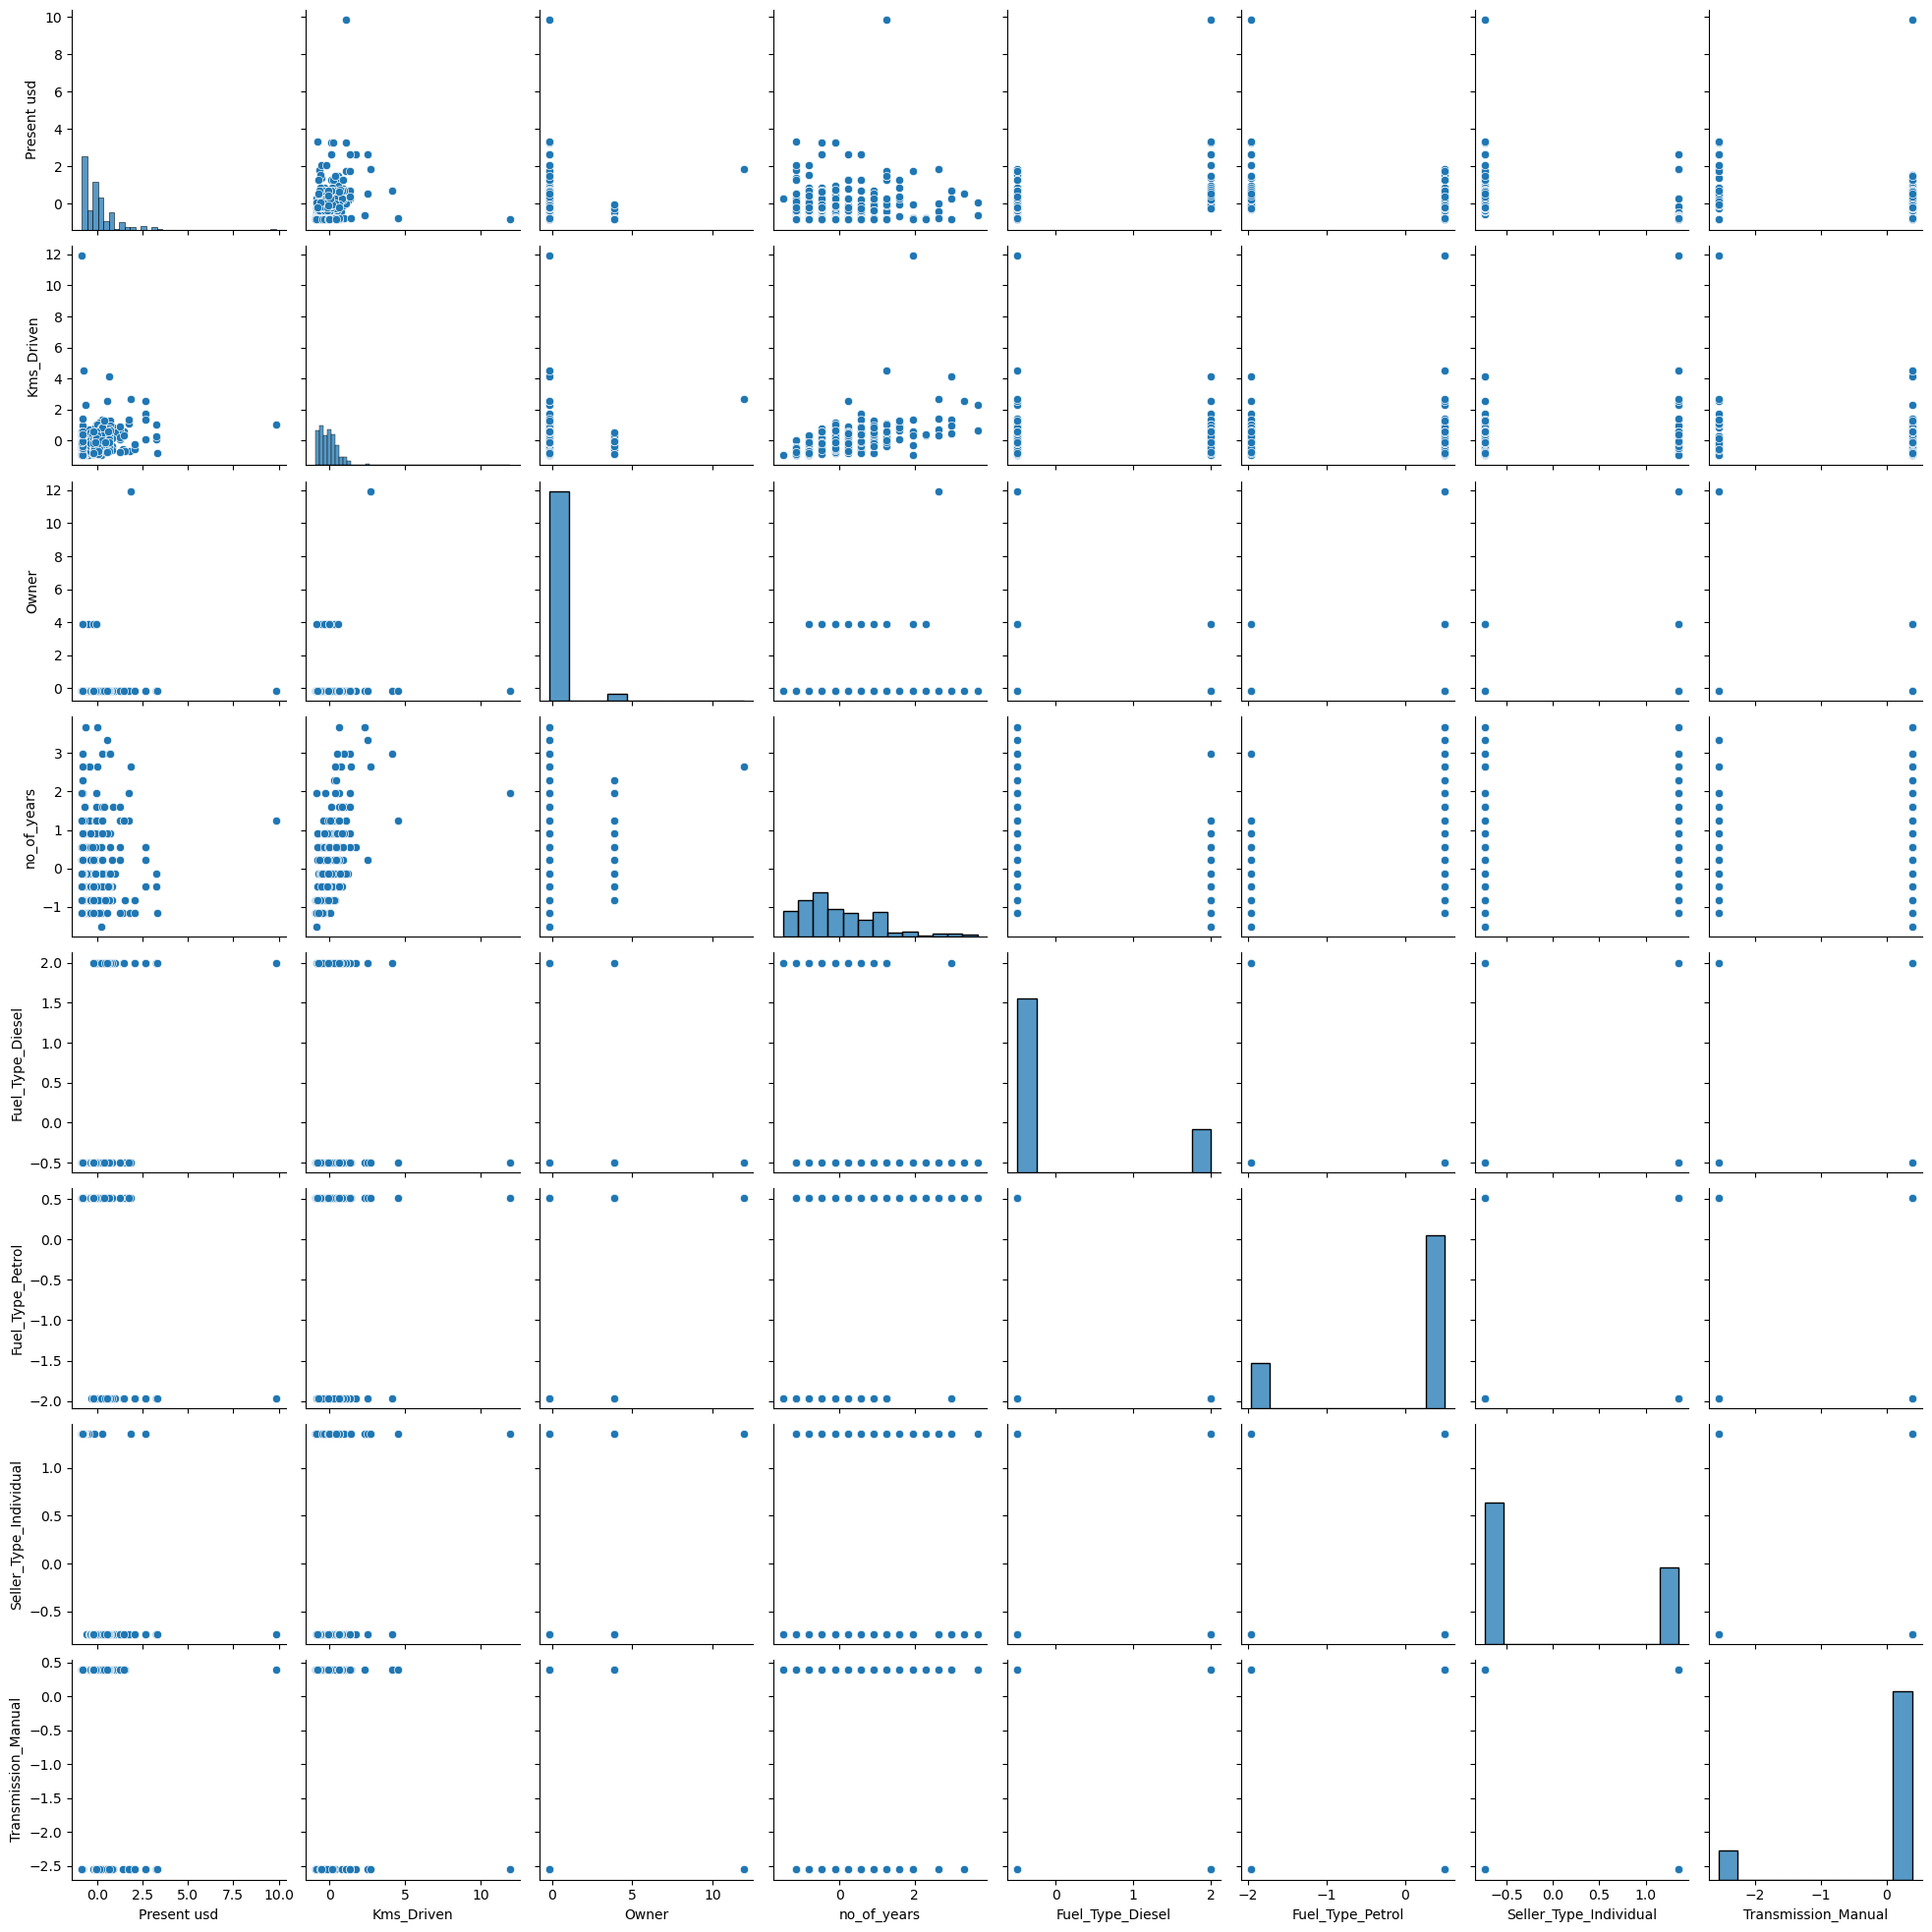

In [330]:
sns.pairplot(X1)
plt.show()

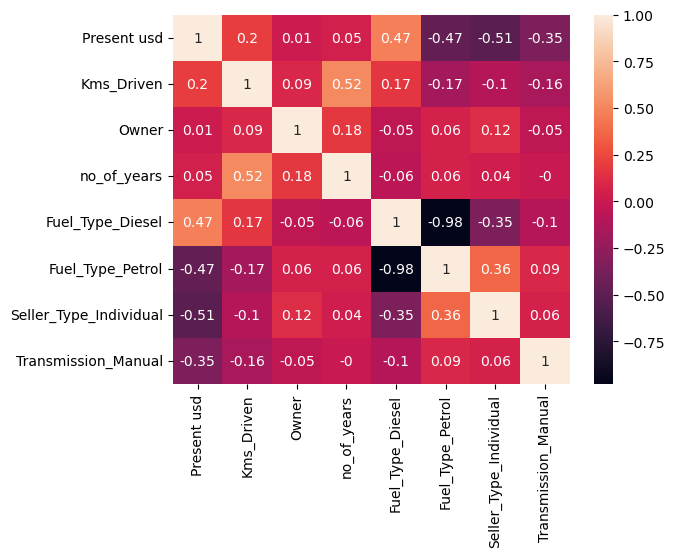

In [331]:
sns.heatmap(X1.corr().round(2), annot=True)
plt.show()

### Features and Target Variables

In [292]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.25,random_state=0)

In [293]:
#Taking 225 Samples for Training and 76 for testing
X_train.head()

,Present usd,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
146,0.787,15000,0,7,0,1,1,1
260,13.600,29223,0,5,0,1,0,1
37,2.280,127000,0,18,0,1,1,1
273,7.500,61203,0,11,0,1,0,1
164,0.540,14000,0,5,0,1,1,1


#Fitting different models to check their performance
1. Multivariate Linear Regression
2. Decision Tree
3. Random Forest Regressor
4. Neural Network
5. KNN
#Dimintionality Reduction
1. PCA
#Scaling
Minmax

### 1. Linear Regression Model

In [294]:
MAE = []
MSE = []
RMSE = []
r2 = []

In [295]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
#print errors
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)
r2.append(R2)

MAE: 1.1969864403009076
MSE: 4.349378132257332
RMSE: 2.085516274752449
R2: 0.8639362504421002


### 2. Decision Tree model

In [296]:
from sklearn.tree import DecisionTreeRegressor

#creating object for Decision tree
tree = DecisionTreeRegressor()

#fitting the decision tree model
tree.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = tree.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)
r2.append(R2)

MAE: 0.8796052631578949
MSE: 2.8957749999999995
RMSE: 1.7016976817284555
R2: 0.9094100369306046


### 3. Random Forest

In [297]:
from sklearn.ensemble import RandomForestRegressor

#creating object for Random forest regressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

#fitting the rf model
rf.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = rf.predict(X_test)

#print errors
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)
r2.append(R2)

MAE: 0.7727513157894738
MSE: 2.642217535921052
RMSE: 1.6254899371946454
R2: 0.9173422006197316


C:\Users\18562\AppData\Local\Temp\ipykernel_25852\2059104574.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


### 4. SVR

In [298]:
from sklearn.svm import SVR
regr = SVR()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
#print errors
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)
r2.append(R2)

MAE: 3.4733767817967647
MSE: 37.359024978589375
RMSE: 6.112202956266208
R2: -0.16872087545442205


C:\softwares\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 5. Neural Network

In [299]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test)
regr.score(X_test, y_test)

C:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.6979514789947614

In [300]:
y_pred = regr.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)
r2.append(R2)

MAE: 4.926577241340418
MSE: 54.27627164743997
RMSE: 7.367243151100686
R2: -0.6979514789947614


In [301]:
#Repeating With Scaled Dataset

In [302]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [303]:
column_names = []
for c in X1.columns:
    column_names.append(c)

In [304]:
print(column_names)

['Present usd', 'Kms_Driven', 'Owner', 'no_of_years', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']


In [305]:
from sklearn.preprocessing import StandardScaler#features# Separating out the features
X1 = StandardScaler().fit_transform(X1)
X1 = pd.DataFrame(X1, columns =column_names)
X1.head()

,Present usd,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,-0.236215,-0.256224,-0.174501,-0.128897,-0.498962,0.509327,-0.737285,0.39148
1,0.221505,0.155911,-0.174501,0.217514,2.004162,-1.963374,-0.737285,0.39148
2,0.257427,-0.773969,-0.174501,-1.168129,-0.498962,0.509327,-0.737285,0.39148
3,-0.403079,-0.817758,-0.174501,0.910335,-0.498962,0.509327,-0.737285,0.39148
4,-0.087890,0.141743,-0.174501,-0.128897,2.004162,-1.963374,-0.737285,0.39148


In [306]:
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.25,random_state=0)

1. Linear Regression after Scaling

In [307]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
#print errors
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)

MAE: 1.196986440300909
MSE: 4.349378132257337
RMSE: 2.0855162747524503
R2: 0.8639362504421


2. Decision Tree model

In [308]:
from sklearn.tree import DecisionTreeRegressor

#creating object for Decision tree
tree = DecisionTreeRegressor()

#fitting the decision tree model
tree.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = tree.predict(X_test)

#print errors
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)

MAE: 0.8421052631578947
MSE: 2.4629236842105264
RMSE: 1.5693704738558472
R2: 0.922951138954038


3. Random Forest - Scaler

In [309]:
from sklearn.ensemble import RandomForestRegressor

#creating object for Random forest regressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

#fitting the rf model
rf.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = rf.predict(X_test)

#print errors
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)

MAE: 0.7618026315789475
MSE: 2.6213776447368415
RMSE: 1.6190669055776667
R2: 0.9179941452538098


C:\Users\18562\AppData\Local\Temp\ipykernel_25852\531649128.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


4. SVR scaled Data

In [310]:
from sklearn.svm import SVR
regr = SVR()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
#print errors
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)

MAE: 1.516915708790308
MSE: 13.976464519523276
RMSE: 3.7385110029961495
R2: 0.56276734046522


C:\softwares\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5. Neural Network

In [311]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[:2])
regr.score(X_test, y_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)

C:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 1.516915708790308
MSE: 13.976464519523276
RMSE: 3.7385110029961495
R2: 0.56276734046522


C:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### After PCA

In [312]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
#pca.fit(X1)
X1_ = pca.fit_transform(X1)

In [313]:
X2 = pd.DataFrame(X1_, columns =['PC1','PC2'])
X2.head()

,PC1,PC2
0,-0.490285,-0.322115
1,2.468345,-0.488686
2,-0.393046,-1.291685
3,-0.657654,0.021169
4,2.314750,-0.745471


In [314]:
X_train,X_test,y_train,y_test = train_test_split(X2,y,test_size=0.25,random_state=0)

In [315]:
MAEp = []
MSEp = []
RMSEp = []
r2P = []

In [316]:
#Linear Regreesion
from sklearn.linear_model import LinearRegression

regp = LinearRegression()
regp.fit(X_train,y_train)
y_pred = regp.predict(X_test)

y_pred = regp.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
MAEp.append(metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
MSEp.append(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
RMSEp.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)
r2P.append(R2)

MAE: 2.1243399435719694
MSE: 12.419527310235592
RMSE: 3.5241349733282905
R2: 0.6114737780478148


In [317]:
#Decision Tree
treep = DecisionTreeRegressor()
treep.fit(X_train,y_train)

y_pred = treep.predict(X_test)

#print errors
y_pred = treep.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
MAEp.append(metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
MSEp.append(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
RMSEp.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)
r2P.append(R2)

MAE: 1.4268421052631577
MSE: 8.873378947368419
RMSE: 2.9788217380985422
R2: 0.7224096930380105


In [318]:
MAEp

[2.1243399435719694, 1.4268421052631577]

In [319]:
#Random Forest
rfp = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfp.fit(X_train,y_train)

y_pred = rfp.predict(X_test)

#print errors
y_pred = rfp.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
MAEp.append(metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
MSEp.append(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
RMSEp.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)
r2P.append(R2)

C:\Users\18562\AppData\Local\Temp\ipykernel_25852\3313338163.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfp.fit(X_train,y_train)


MAE: 1.157207894736843
MSE: 5.637789766315791
RMSE: 2.3744030336730515
R2: 0.8236302313806969


In [320]:
#Support Vector Regressor
regr_svr = SVR()
regr_svr.fit(X_train,y_train)

y_pred = regr_svr.predict(X_test)

#print errors
y_pred = regr_svr.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
MAEp.append(metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
MSEp.append(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
RMSEp.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)
r2P.append(R2)

MAE: 1.7270775486546663
MSE: 15.686290308415844
RMSE: 3.9605921663831842
R2: 0.509278013749271


C:\softwares\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [321]:
#Neural Network
regr_ml = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr_ml.fit(X_train,y_train)


y_pred = regr_ml.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
MAEp.append(metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
MSEp.append(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
RMSEp.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)
r2P.append(R2)

C:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 1.7342790347659058
MSE: 10.317498866343374
RMSE: 3.212086372802477
R2: 0.6772325746059088


C:\softwares\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Comparing models

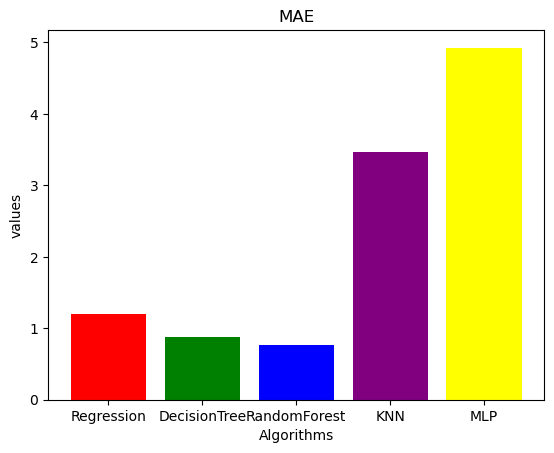

In [322]:
A=[1,2,3,4,5]
plt.bar(A,MAE,tick_label=['Regression','DecisionTree','RandomForest','KNN','MLP'],color=['red','green','blue','purple', 'yellow'])
plt.xlabel('Algorithms')
plt.ylabel('values')
plt.title('MAE')
plt.show()

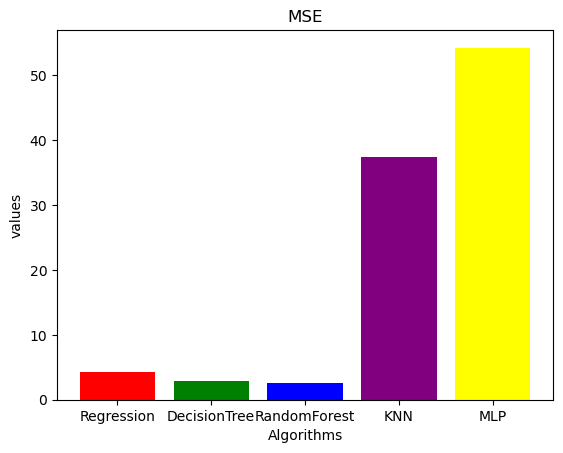

In [323]:
A=[1,2,3,4,5]
plt.bar(A,MSE,tick_label=['Regression','DecisionTree','RandomForest','KNN','MLP'],color=['red','green','blue','purple', 'yellow'])
plt.xlabel('Algorithms')
plt.ylabel('values')
plt.title('MSE')
plt.show()

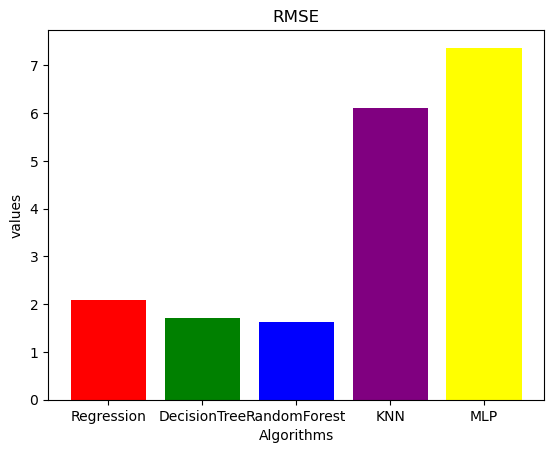

In [324]:
A=[1,2,3,4,5]
plt.bar(A,RMSE,tick_label=['Regression','DecisionTree','RandomForest','KNN','MLP'],color=['red','green','blue','purple', 'yellow'])
plt.xlabel('Algorithms')
plt.ylabel('values')
plt.title('RMSE')
plt.show()

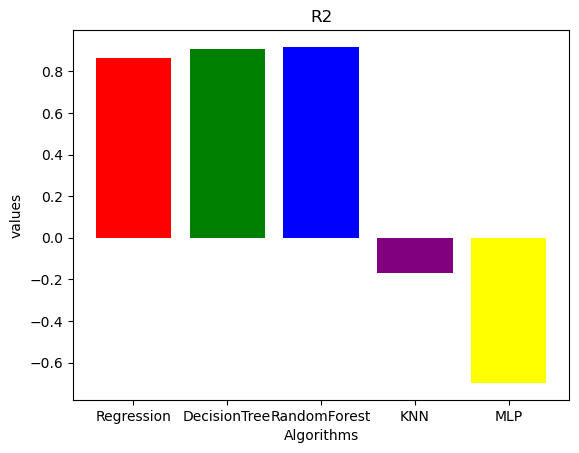

In [325]:
A=[1,2,3,4,5]
plt.bar(A,r2,tick_label=['Regression','DecisionTree','RandomForest','KNN','MLP'],color=['red','green','blue','purple', 'yellow'])
plt.xlabel('Algorithms')
plt.ylabel('values')
plt.title('R2')
plt.show()

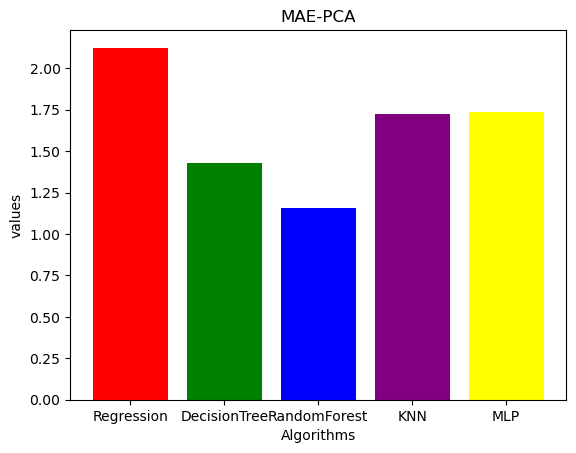

In [326]:
A=[1,2,3,4,5]
plt.bar(A,MAEp,tick_label=['Regression','DecisionTree','RandomForest','KNN','MLP'],color=['red','green','blue','purple', 'yellow'])
plt.xlabel('Algorithms')
plt.ylabel('values')
plt.title('MAE-PCA')
plt.show()

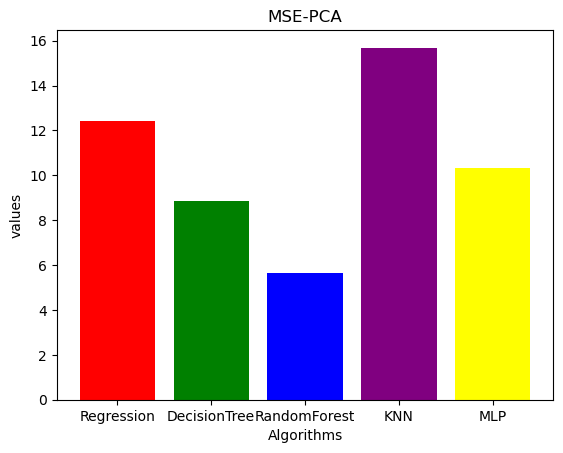

In [327]:
A=[1,2,3,4,5]
plt.bar(A,MSEp,tick_label=['Regression','DecisionTree','RandomForest','KNN','MLP'],color=['red','green','blue','purple', 'yellow'])
plt.xlabel('Algorithms')
plt.ylabel('values')
plt.title('MSE-PCA')
plt.show()

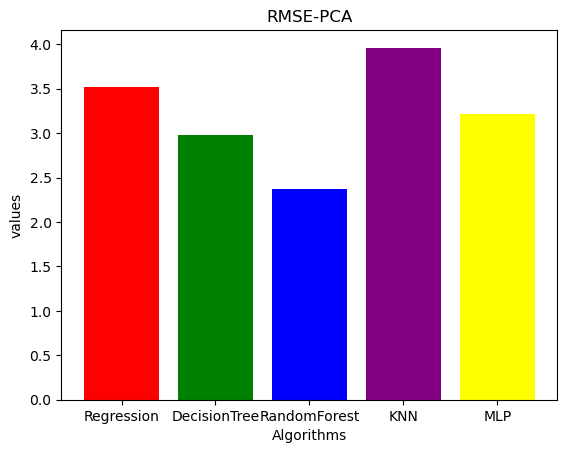

In [328]:
A=[1,2,3,4,5]
plt.bar(A,RMSEp,tick_label=['Regression','DecisionTree','RandomForest','KNN','MLP'],color=['red','green','blue','purple', 'yellow'])
plt.xlabel('Algorithms')
plt.ylabel('values')
plt.title('RMSE-PCA')
plt.show()

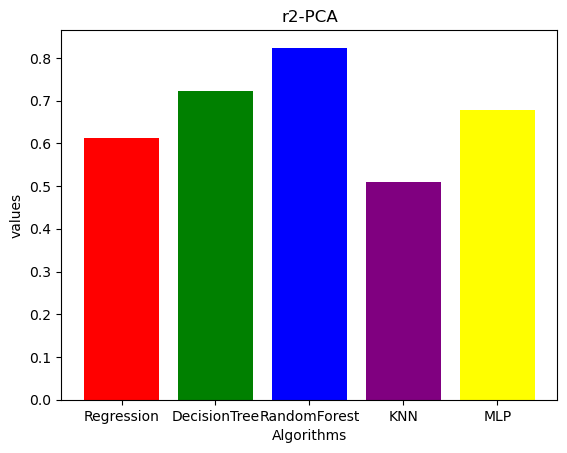

In [329]:
A=[1,2,3,4,5]
plt.bar(A,r2P,tick_label=['Regression','DecisionTree','RandomForest','KNN','MLP'],color=['red','green','blue','purple', 'yellow'])
plt.xlabel('Algorithms')
plt.ylabel('values')
plt.title('r2-PCA')
plt.show()